In [1]:
import scipy.optimize as so
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rn

In [2]:
def fitnessFunction(X):
    v = float(X)
    m = 1 + (np.cos(0.04*v))**2
    n = np.exp((- (v) **2 )/(20000))
    return m * n

In [3]:
X = []
for i in range(-500, 500, 1):
    X = X + [i]

In [4]:
Y = []
for i in X:
    Y = Y + [fitnessFunction(i)]

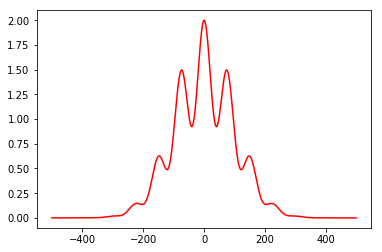

In [5]:
plt.plot(X, Y, color = 'red')
plt.show()

In [6]:
def cost_function(X): return -fitnessFunction(X)

In [7]:
interval = (-500, 500)

In [8]:
def annealing(random_start,
              cost_function,
              random_neighbour,
              acceptance,
              temperature,
              maxsteps=1000,
              debug=True):
    """ Optimize the black-box function 'cost_function' with the simulated annealing algorithm."""
    state = 250
    cost = cost_function(state)
    states, costs = [state], [cost]
    for step in range(maxsteps):
        fraction = step / float(maxsteps)
        T = temperature(fraction)
        new_state = random_neighbour(state, fraction)
        new_cost = cost_function(new_state)
        if debug: print("Step #{:>2}/{:>2} : T = {:>4.3g}, state = {:>4.3g}, cost = {:>4.3g}, new_state = {:>4.3g}, new_cost = {:>4.3g} ...".format(step, maxsteps, T, state, cost, new_state, new_cost))
        if acceptance_probability(cost, new_cost, T) > rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
            # print("  ==> Accept it!")
        # else:
        #    print("  ==> Reject it...")
    return state, cost_function(state), states, costs

In [9]:
def temperature(fraction):
    """ Example of temperature dicreasing as the process goes on."""
    return max(10, min(10, 10 - fraction))

def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        # print("    - Acceptance probabilty = 1 as new_cost = {} < cost = {}...".format(new_cost, cost))
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        # print("    - Acceptance probabilty = {:.3g}...".format(p))
        return p
    
def random_neighbour(x, fraction=50):
    """Move a little bit x, from the left or the right."""
    amplitude = (max(interval) - min(interval)) * fraction / 10
    delta = (-amplitude/2.) + amplitude * rn.random_sample()
    return clip(x + delta)

def random_start():
    """ Random point in the interval."""
    a, b = interval
    return a + (b - a) * rn.random_sample()

def clip(x):
    """ Force x to be in the interval."""
    a, b = interval
    return max(min(x, b), a)

In [11]:
state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=10000, debug=False)

print(c)
print(min(costs))

-0.01971978139419895
-1.99999948672573


In [12]:
for i in range(0,len(states)):
    if costs[i] == min(costs):
        print("Minimum is xmin = {} and ymin = {} in {} iterations.".format(states[i], costs[i], i))

Minimum is xmin = 0.01737602058583576 and ymin = -1.99999948672573 in 5174 iterations.


In [13]:
def see_annealing(states, costs):
    plt.figure()
    plt.suptitle("Evolution of states and costs of the simulated annealing")
    plt.subplot(121)
    plt.plot(states, 'r')
    plt.title("States")
    plt.subplot(122)
    plt.plot(costs, 'b')
    plt.title("Costs")
    plt.show()

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


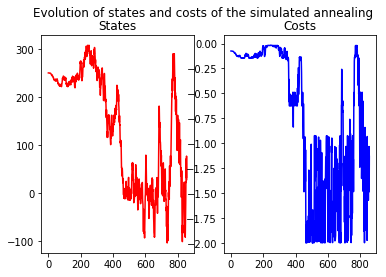

Number of times the algorithm reached the minimum for temperature 1 is 85%


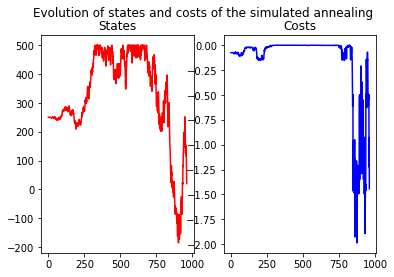

Number of times the algorithm reached the minimum for temperature 5 is 95%


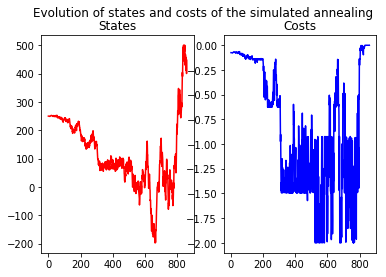

Number of times the algorithm reached the minimum for temperature 10 is 90%


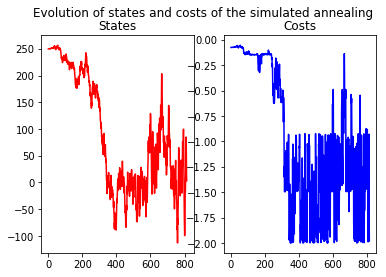

Number of times the algorithm reached the minimum for temperature 50 is 90%


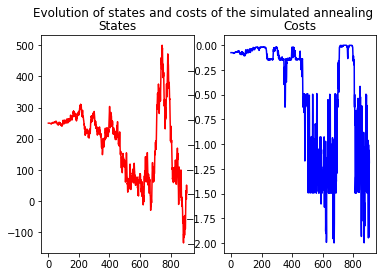

Number of times the algorithm reached the minimum for temperature 100 is 95%


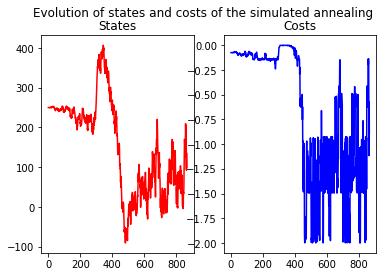

Number of times the algorithm reached the minimum for temperature 500 is 90%


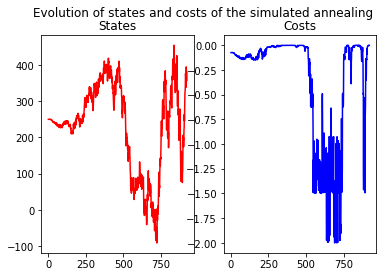

Number of times the algorithm reached the minimum for temperature 1000 is 95%


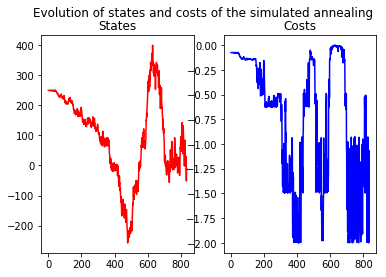

Number of times the algorithm reached the minimum for temperature 5000 is 85%


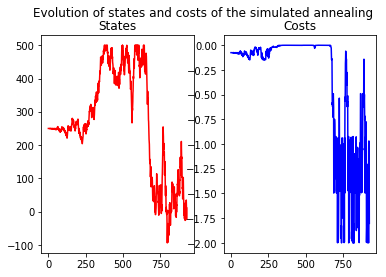

Number of times the algorithm reached the minimum for temperature 10000 is 95%


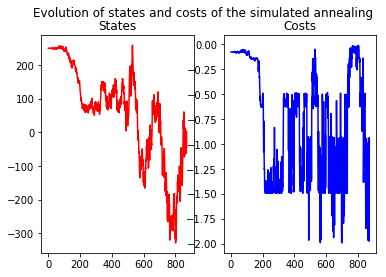

Number of times the algorithm reached the minimum for temperature 50000 is 85%


In [14]:
count = 0
initTemp = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000]
for t in initTemp:
    def temperature(t):
        return t
    count = 0
    for i in range(0,20):
        state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=False)
        if min(costs) < -1.99:
            count = count + 1
    see_annealing(states, costs)
    print("Number of times the algorithm reached the minimum for temperature {} is {}%".format(t, count*5))
    